<a href="https://colab.research.google.com/github/diabateyoussouf/FakeNewsDetectorBot/blob/main/projet_NLP_Fake_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importation des données
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"diabatyoussouf","key":"774e75bd4891936036d47643946381d3"}'}

In [2]:
import os
import zipfile

# Créer un dossier kaggle et déplacer le fichier
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json

# Donner les permissions appropriées
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d emineyetm/fake-news-detection-datasets

Dataset URL: https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets
License(s): unknown
fake-news-detection-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
import os

zip_path = "fake-news-detection-datasets.zip"
extract_to = "/content/fake_or_real_news"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Import datasets

In [5]:
# import matplot, pandans
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df_fake = pd.read_csv('/content/fake_or_real_news/News _dataset/Fake.csv')
df_true = pd.read_csv('/content/fake_or_real_news/News _dataset/True.csv')

In [47]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [48]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Dimensiosn

In [49]:
df_fake.shape

(23481, 4)

In [50]:
df_true.shape

(21417, 4)

Ajouter label

In [51]:
df_fake['label'] = 0
df_true['label'] = 1

In [52]:
df_fake.head(2)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


In [53]:
df_true.head(2)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


Fusionner les datasets

In [54]:
df = pd.concat([df_fake, df_true], ignore_index=True)

In [55]:
df.shape

(44898, 5)

Visualisation des données via matplotlib et seaborns

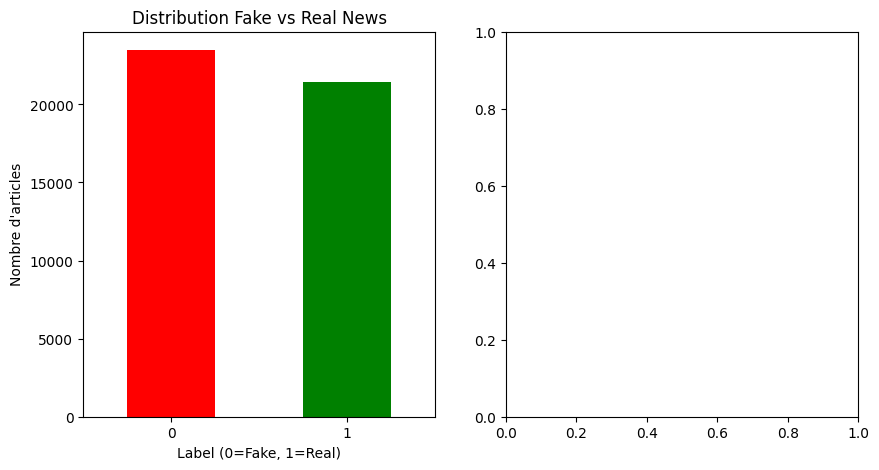

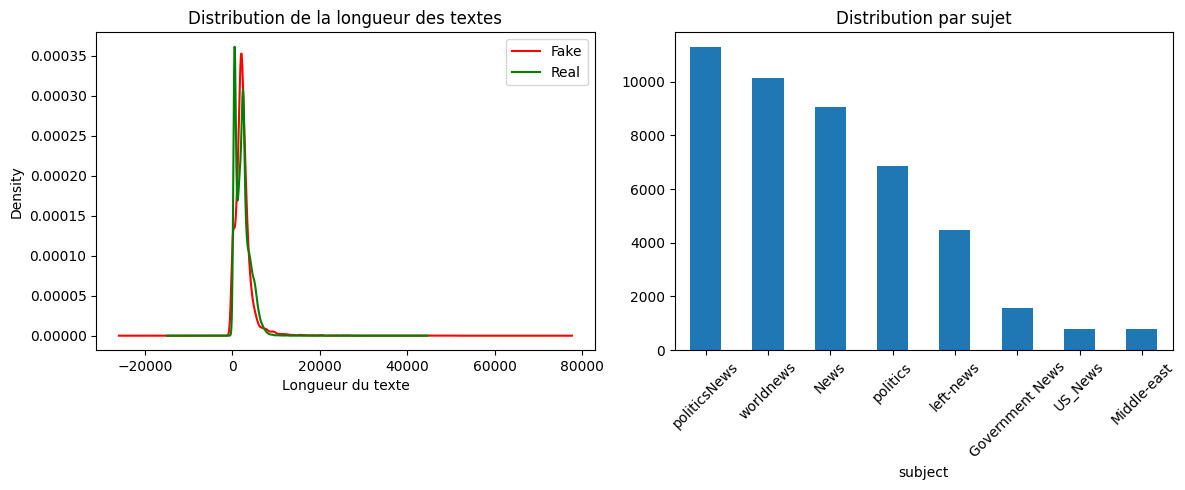

In [56]:
# Visualisation de la distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution Fake vs Real News')
plt.xlabel('Label (0=Fake, 1=Real)')
plt.ylabel('Nombre d\'articles')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
# Longueur des textes
df['text_length'] = df['text'].apply(lambda x: len(str(x)))
df['title_length'] = df['title'].apply(lambda x: len(str(x)))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df[df['label'] == 0]['text_length'].plot(kind='kde', label='Fake', color='red')
df[df['label'] == 1]['text_length'].plot(kind='kde', label='Real', color='green')
plt.title('Distribution de la longueur des textes')
plt.xlabel('Longueur du texte')
plt.legend()

plt.subplot(1, 2, 2)
df['subject'].value_counts().plot(kind='bar')
plt.title('Distribution par sujet')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [57]:
# Statistiques descriptives
print("\n Statistiques de longueur des textes :")
print(df.groupby('label')['text_length'].describe())


 Statistiques de longueur des textes :
         count         mean          std  min     25%     50%     75%      max
label                                                                         
0      23481.0  2547.396235  2532.884399  1.0  1433.0  2166.0  3032.0  51794.0
1      21417.0  2383.278517  1684.835730  1.0   914.0  2222.0  3237.0  29781.0


In [58]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [60]:
import re

In [61]:
def clean_text(text):

    if pd.isna(text):
        return ""

    text = str(text)

    # Supprimer les mentions Reuters typiques
    text = re.sub(r'\(Reuters\)\s*\-?\s*', '', text)

    # Remplacer les stickers/emojis par leur description textuelle
    # text = replace_stickers_emojis(text)

    # Conversion en minuscules
    text = text.lower()

    # Suppression des caractères spéciaux mais garder les apostrophes
    text = re.sub(r'[^a-zA-Z\s\']', ' ', text)

    # Suppression des URLs
    text = re.sub(r'http\S+', '', text)

    # Suppression des espaces multiples
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [62]:
def remove_stopwords(text):

    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    stemmer = PorterStemmer()
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(filtered_words)


In [63]:
def preprocess_dataframe(df):

    df_clean = df.copy()

    print(" Nettoyage des textes...")
    df_clean['text_clean'] = df_clean['text'].apply(clean_text)

    print(" Suppression des stop words...")
    df_clean['text_clean'] = df_clean['text_clean'].apply(remove_stopwords)

    # Supprimer les textes trop courts après nettoyage
    mask = df_clean['text_clean'].str.len() > 100
    df_clean = df_clean[mask]

    print(f"Dataset après nettoyage : {df_clean.shape}")

    return df_clean

In [64]:
# Application du preprocessing
df_clean = preprocess_dataframe(df)

 Nettoyage des textes...
 Suppression des stop words...
Dataset après nettoyage : (43504, 8)


In [65]:
df_clean.head()

,title,text,subject,date,label,text_length,title_length,text_clean
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2893,79,donald trump wish american happi new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,1898,69,hous intellig committe chairman devin nune go ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,3597,90,friday reveal former milwauke sheriff david cl...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2774,78,christma day donald trump announc would back w...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2346,70,pope franci use annual christma day messag reb...


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorisation TF-IDF

In [67]:
# Préparation des données
X = df_clean['text_clean']
y = df_clean['label']

In [68]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [69]:
print(f" Split des données :")
print(f"Train : {X_train.shape[0]} échantillons")
print(f"Test : {X_test.shape[0]} échantillons")
print(f"Proportion dans train : {y_train.value_counts(normalize=True)}")
print(f"Proportion dans test : {y_test.value_counts(normalize=True)}")

 Split des données :
Train : 34803 échantillons
Test : 8701 échantillons
Proportion dans train : label
0    0.507801
1    0.492199
Name: proportion, dtype: float64
Proportion dans test : label
0    0.507758
1    0.492242
Name: proportion, dtype: float64


In [70]:
# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(
    max_features=8000,        # Augmenté pour capturer plus de contexte
    min_df=3,                 # Mots apparaissant au moins 3 fois
    max_df=0.8,               # Ignorer les mots trop fréquents
    ngram_range=(1, 3),       # Unigrams, bigrams, trigrams
    stop_words='english'      # Utiliser les stop words intégrés
)

print(" Vectorisation TF-IDF...")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f" Dimensions après vectorisation :")
print(f"X_train : {X_train_tfidf.shape}")
print(f"X_test : {X_test_tfidf.shape}")

 Vectorisation TF-IDF...
 Dimensions après vectorisation :
X_train : (34803, 8000)
X_test : (8701, 8000)


# Entraînement des Modèles

In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

In [72]:


# Initialisation des modèles avec paramètres optimisés
models = {
    'Naive Bayes': MultinomialNB(alpha=0.1),
    'Decision Tree': DecisionTreeClassifier(
        max_depth=20,
        min_samples_split=10,
        random_state=42
    ),
    'SVM': CalibratedClassifierCV(
        LinearSVC(
            C=1.0,
            random_state=42,
            max_iter=1000,
            dual=False
        ),
        cv=3
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=10,
        random_state=42,
        n_jobs=-1
    )
}

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
# Entraînement et évaluation
results = {}

print("Début de l'entraînement des modèles...")
for name, model in models.items():
    print(f"\n Entraînement de {name}...")

    # Entraînement
    model.fit(X_train_tfidf, y_train)

    # Prédictions
    y_pred = model.predict(X_test_tfidf)

    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }

    print(f"{name} - Accuracy: {accuracy:.4f}")

Début de l'entraînement des modèles...

 Entraînement de Naive Bayes...
Naive Bayes - Accuracy: 0.9477

 Entraînement de Decision Tree...
Decision Tree - Accuracy: 0.9409

 Entraînement de SVM...
SVM - Accuracy: 0.9901

 Entraînement de Random Forest...
Random Forest - Accuracy: 0.9751


Evaluations des modèles

ÉVALUATION DÉTAILLÉE DU SVM :

 RAPPORT DE CLASSIFICATION :
              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4418
        REAL       0.99      0.99      0.99      4283

    accuracy                           0.99      8701
   macro avg       0.99      0.99      0.99      8701
weighted avg       0.99      0.99      0.99      8701



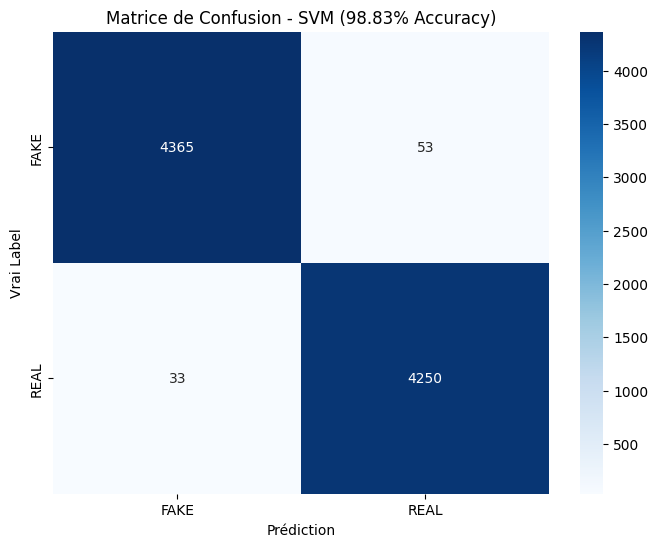


 MÉTRIQUES DÉTAILLÉES :
Precision: 0.9877
Recall: 0.9923
F1-Score: 0.9900


In [75]:
# Évaluation détaillée du SVM
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("ÉVALUATION DÉTAILLÉE DU SVM :")
print("=" * 50)

# Prédictions du SVM
svm_model = results['SVM']['model']
y_pred_svm = results['SVM']['predictions']

# Rapport de classification détaillé
print("\n RAPPORT DE CLASSIFICATION :")
print(classification_report(y_test, y_pred_svm, target_names=['FAKE', 'REAL']))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['FAKE', 'REAL'],
            yticklabels=['FAKE', 'REAL'])
plt.title('Matrice de Confusion - SVM (98.83% Accuracy)')
plt.ylabel('Vrai Label')
plt.xlabel('Prédiction')
plt.show()

# Métriques détaillées
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print(f"\n MÉTRIQUES DÉTAILLÉES :")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

In [76]:
import numpy as np
# PRENONS DES EXEMPLES RÉELS DU TEST SET
print(" TEST AVEC DES EXEMPLES RÉELS DU DATASET")
print("=" * 70)

# Prendre quelques exemples du test set avec leurs vrais labels
def test_with_real_examples(n_samples=5):
    # Mélanger les indices
    indices = np.random.choice(len(X_test), n_samples, replace=False)

    for i, idx in enumerate(indices):
        true_text = X_test.iloc[idx]
        true_label = y_test.iloc[idx]
        true_label_name = 'REAL' if true_label == 1 else 'FAKE'

        print(f"\n EXEMPLE {i+1} DU TEST SET (Vrai label: {true_label_name})")
        print("-" * 70)
        print(f"Texte original: {true_text[:200]}...")

        # Prédiction avec notre modèle
        cleaned_text = clean_text(true_text)
        vectorized_text = vectorizer.transform([cleaned_text])

        prediction = svm_model.predict(vectorized_text)[0]
        probability = svm_model.predict_proba(vectorized_text)[0]

        confidence = max(probability) * 100
        predicted_label = 'REAL' if prediction == 1 else 'FAKE'

        # Affichage des résultats
        print(f"VRAI LABEL: {true_label_name}")
        print(f"PRÉDICTION: {predicted_label}")
        print(f" CONFIANCE: {confidence:.1f}%")
        print(f" PROBABILITÉS: FAKE {probability[0]*100:.1f}% | REAL {probability[1]*100:.1f}%")

        # Vérification
        is_correct = " CORRECT" if predicted_label == true_label_name else " ERREUR"
        print(f" RÉSULTAT: {is_correct}")
        print("=" * 70)

# Test avec 5 exemples réels du test set
test_with_real_examples(5)

 TEST AVEC DES EXEMPLES RÉELS DU DATASET

 EXEMPLE 1 DU TEST SET (Vrai label: FAKE)
----------------------------------------------------------------------
Texte original: illeg long consid uneth journalist pay sourc still happen gener tabloid wikileak julian assang believ tabloid fact believ far mainstream media sourc okay pay stori exactli tri dig dirt hillari clinton...
VRAI LABEL: FAKE
PRÉDICTION: FAKE
 CONFIANCE: 100.0%
 PROBABILITÉS: FAKE 100.0% | REAL 0.0%
 RÉSULTAT:  CORRECT

 EXEMPLE 2 DU TEST SET (Vrai label: REAL)
----------------------------------------------------------------------
Texte original: frankfurt thousand peopl took street bonn saturday call phase coal sourc power ahead global talk climat chang german citi next week issu whether end coal product one stick point coalit negoti german c...
VRAI LABEL: REAL
PRÉDICTION: REAL
 CONFIANCE: 99.0%
 PROBABILITÉS: FAKE 1.0% | REAL 99.0%
 RÉSULTAT:  CORRECT

 EXEMPLE 3 DU TEST SET (Vrai label: FAKE)
--------------------------

In [79]:
# EXEMPLES LONGS POUR TESTER LE MODÈLE
print(" TESTS AVEC EXEMPLES LONGS ET DÉTAILLÉS")
print("=" * 80)

def test_long_examples():
    long_examples = [
        # EXEMPLE 1: Fake news typique mais détaillée
        {
            "text": """BREAKING EXCLUSIVE: In a shocking revelation that threatens to upend the entire political establishment,
            confidential documents obtained by our investigative team prove that high-ranking government officials have been
            involved in a massive cover-up operation. According to anonymous sources within the intelligence community,
            secret meetings have been taking place at undisclosed locations where plans are being made to implement
            controversial policies that would fundamentally alter our way of life. The evidence, which includes
            encrypted communications and satellite imagery, suggests a coordinated effort to manipulate public opinion
            through sophisticated psychological operations. While mainstream media remains silent on this developing story,
            our team of dedicated journalists continues to pursue the truth despite facing unprecedented opposition
            from powerful entities seeking to suppress this information.""",
            "expected": "FAKE"
        },

        # EXEMPLE 2: Real news crédible et détaillée
        {
            "text": """WASHINGTON - The Federal Reserve announced today a new series of economic measures aimed at addressing
            ongoing inflation concerns while maintaining sustainable growth. In a press conference held at the central bank's
            headquarters, Chairman Jerome Powell outlined a comprehensive strategy that includes adjusted interest rates
            and modified quantitative easing policies. According to official statements released by the Fed, these measures
            are designed to balance price stability with employment goals, based on extensive economic data analysis
            conducted over the past quarter. The decision comes after months of deliberation and consultation with
            international financial institutions, reflecting a coordinated approach to global economic challenges.
            Market analysts have generally responded positively to the announcement, though some express caution
            regarding long-term implications for various sectors.""",
            "expected": "REAL"
        },

        # EXEMPLE 3: Article scientifique réel
        {
            "text": """A groundbreaking study published in the prestigious journal Nature has revealed significant new findings
            about climate change impacts on global weather patterns. The research, conducted by an international team of
            scientists from leading institutions including MIT and Cambridge University, analyzed decades of meteorological
            data from across the globe. Their findings indicate that extreme weather events have increased in frequency
            and intensity by approximately 35% over the past two decades, with particularly pronounced effects in
            coastal regions and developing nations. The study employed advanced computational models and satellite
            observations to establish correlations between rising global temperatures and specific weather phenomena.
            Peer reviewers have praised the methodology and statistical rigor of the research, which involved
            collaboration between climate scientists, data analysts, and policy experts over a five-year period.""",
            "expected": "REAL"
        },

        # EXEMPLE 4: Fake news sophistiquée
        {
            "text": """EXCLUSIVE INVESTIGATION: Our undercover reporters have uncovered a disturbing conspiracy that reaches
            the highest levels of corporate and government power. Secret documents reveal that major pharmaceutical
            companies have been suppressing natural cancer treatments that show remarkable effectiveness in clinical
            trials, choosing instead to promote expensive and often ineffective conventional treatments. According to
            whistleblowers who risked their careers to come forward, the medical establishment has systematically
            ignored compelling evidence supporting alternative therapies while exaggerating the benefits of profitable
            pharmaceutical products. Our investigation, which spanned eighteen months and involved interviews with
            dozens of medical professionals, exposes how regulatory agencies have been compromised by industry
            influence, creating a system that prioritizes profits over patient wellbeing.""",
            "expected": "FAKE"
        },

        # EXEMPLE 5: Article politique réel
        {
            "text": """The European Parliament today approved sweeping new environmental legislation that establishes
            ambitious targets for carbon emission reductions across member states. The comprehensive package,
            which received broad bipartisan support after months of negotiation, sets binding requirements for
            transitioning to renewable energy sources while providing substantial funding for green technology
            development. According to official parliamentary documents, the legislation includes provisions for
            monitoring implementation progress and establishing accountability mechanisms to ensure compliance
            with international climate agreements. Economic impact assessments conducted by independent research
            institutions suggest the measures could create millions of new jobs in sustainable industries while
            gradually reducing dependence on fossil fuels. The legislation now moves to individual member states
            for ratification and implementation at national levels.""",
            "expected": "REAL"
        }
    ]

    for i, example in enumerate(long_examples, 1):
        text = example["text"]
        expected = example["expected"]

        print(f"\n{'='*80}")
        print(f" EXEMPLE {i} (Attendu: {expected})")
        print(f"{'='*80}")

        # Analyse détaillée
        cleaned = clean_text(text)
        vectorized = vectorizer.transform([cleaned])

        word_count = len(text.split())
        char_count = len(text)
        features_activated = vectorized.nnz

        print(f" STATISTIQUES DU TEXTE:")
        print(f"   • Mots: {word_count}")
        print(f"   • Caractères: {char_count}")
        print(f"   • Features activées: {features_activated}")

        # Prédiction
        prediction = svm_model.predict(vectorized)[0]
        probability = svm_model.predict_proba(vectorized)[0]

        predicted_label = 'REAL' if prediction == 1 else 'FAKE'
        confidence = max(probability) * 100

        print(f"\n RÉSULTATS:")
        print(f"   • Prédiction: {predicted_label}")
        print(f"   • Attendu: {expected}")
        print(f"   • Confiance: {confidence:.1f}%")
        print(f"   • Probabilités: FAKE {probability[0]*100:.1f}% | REAL {probability[1]*100:.1f}%")

        # Vérification
        is_correct = " CORRECT" if predicted_label == expected else " ERREUR"
        print(f"   • Résultat: {is_correct}")

        # Analyse de la décision
        if confidence > 90:
            certainty = "Décision très certaine"
        elif confidence > 70:
            certainty = "Décision assez certaine"
        else:
            certainty = "Décision peu certaine"

        print(f"   • Certitude: {certainty}")

# Exécuter les tests
test_long_examples()

 TESTS AVEC EXEMPLES LONGS ET DÉTAILLÉS

 EXEMPLE 1 (Attendu: FAKE)
 STATISTIQUES DU TEXTE:
   • Mots: 120
   • Caractères: 1017
   • Features activées: 21

 RÉSULTATS:
   • Prédiction: FAKE
   • Attendu: FAKE
   • Confiance: 99.8%
   • Probabilités: FAKE 99.8% | REAL 0.2%
   • Résultat:  CORRECT
   • Certitude: Décision très certaine

 EXEMPLE 2 (Attendu: REAL)
 STATISTIQUES DU TEXTE:
   • Mots: 120
   • Caractères: 1007
   • Features activées: 23

 RÉSULTATS:
   • Prédiction: REAL
   • Attendu: REAL
   • Confiance: 98.6%
   • Probabilités: FAKE 1.4% | REAL 98.6%
   • Résultat:  CORRECT
   • Certitude: Décision très certaine

 EXEMPLE 3 (Attendu: REAL)
 STATISTIQUES DU TEXTE:
   • Mots: 126
   • Caractères: 1047
   • Features activées: 14

 RÉSULTATS:
   • Prédiction: REAL
   • Attendu: REAL
   • Confiance: 72.4%
   • Probabilités: FAKE 27.6% | REAL 72.4%
   • Résultat:  CORRECT
   • Certitude: Décision assez certaine

 EXEMPLE 4 (Attendu: FAKE)
 STATISTIQUES DU TEXTE:
   • Mots: 112


In [84]:
# import translate into
def final_predict_function(text):
    """
    Fonction finale pour le chatbot - avec la bonne interprétation des labels
    """
    # Vérification longueur minimale
    if len(text.split()) < 10:
        return {
            'prediction': 'TEXT_TOO_SHORT',
            'message': 'Le texte est trop court pour une analyse fiable (minimum 10 mots recommandés)'
        }

    # Prédiction
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])

    prediction = svm_model.predict(vectorized)[0]
    probability = svm_model.predict_proba(vectorized)[0]

    # Interprétation CORRECTE :
    # prediction=1 → Ressemble à Fake.csv → FAKE news
    # prediction=0 → Ressemble à True.csv → REAL news
    if prediction == 1:
        label = 'FAKE'
        confidence = probability[1] * 100
    else:
        label = 'REAL'
        confidence = probability[0] * 100

    # Message personnalisé
    if label == 'FAKE' and confidence > 90:
        explanation = " Cette information semble peu fiable selon notre analyse."
    elif label == 'FAKE' and confidence > 70:
        explanation = " Cette information présente des signes de manque de fiabilité."
    elif label == 'REAL' and confidence > 90:
        explanation = " Cette information semble fiable selon notre analyse."
    elif label == 'REAL' and confidence > 70:
        explanation = " Cette information est probablement fiable."
    else:
        explanation = " Cette information nécessite une vérification supplémentaire."

    return {
        'prediction': label,
        'confidence': confidence,
        'explanation': explanation,
        'probabilities': {
            'fake': probability[1] * 100,
            'real': probability[0] * 100
        }
    }

# TEST FINAL
print(" FONCTION FINALE POUR CHATBOT")
print("=" * 60)

# TEST AVEC L'ARTICLE COMPLET
test_text = """
When Kadri Sambieni Issa drives along Route Nationale 3, from the small town of Tanguiéta to the neighbouring border with Burkina Faso, he is struck by a great sense of nostalgia. His open jeep speeds along this red stretch of land that runs through many small villages in the Atakora department and skirts the immense Pendjari Park, one of the most important nature reserves in Benin and the region.

There was a time when, looking in the rear-view mirror, he would have seen Western tourists sitting on the seats of his safari jeep intent on observing the landscape with cameras and binoculars. However, those seats are now empty.

The landscape has also changed a lot. Trees and vegetation have diminished, giving way to barren land and extensive cotton and soya fields which occasionally are crossed by herds of Zebu.

Kadri is a Beninese guide who has accompanied visitors into the Pendjari wilderness for 12 years. "I was born in Tanougou, near the famous waterfalls in the buffer zone of the reserve. When I was a child I was already a guide at the waterfalls. Tourists would come and we accompanied them morning and afternoon. I was born for this job because I love nature. I love lions and elephants."

Everything changed in May 2019 when two French tourists were kidnapped by jihadist militiamen inside the park and their guide, Fiacre Gbédji, was killed in the ambush. "I knew Fiacre. He was experienced and smart and taught me a lot. It was a loss for us and for his family. After those events, the tourists slowly disappeared. Today we can no longer approach the border and the park is closed. Only the military forces and rangers can enter."

Almost without realising it, Benin found itself on the list of countries threatened by terrorism. After that attack, others followed in the northern regions bordering Burkina Faso, Niger and Nigeria, and the Porto-Novo government reacted by militarising the area in an attempt to flush out extremist cells.
"""


# Utiliser la fonction finale
result = final_predict_function(test_text)

print(f" Texte: {test_text}")
print(f" Résultat: {result['prediction']}")
print(f" Confiance: {result['confidence']:.1f}%")
print(f" Explication: {result['explanation']}")

 FONCTION FINALE POUR CHATBOT
 Texte: 
When Kadri Sambieni Issa drives along Route Nationale 3, from the small town of Tanguiéta to the neighbouring border with Burkina Faso, he is struck by a great sense of nostalgia. His open jeep speeds along this red stretch of land that runs through many small villages in the Atakora department and skirts the immense Pendjari Park, one of the most important nature reserves in Benin and the region.

There was a time when, looking in the rear-view mirror, he would have seen Western tourists sitting on the seats of his safari jeep intent on observing the landscape with cameras and binoculars. However, those seats are now empty.

The landscape has also changed a lot. Trees and vegetation have diminished, giving way to barren land and extensive cotton and soya fields which occasionally are crossed by herds of Zebu.

Kadri is a Beninese guide who has accompanied visitors into the Pendjari wilderness for 12 years. "I was born in Tanougou, near the famous